#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading and Exploration

### Data Understanding 

In [2]:

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
songs = pd.read_csv('songs.csv') #'composer', 'lyricist'
members = pd.read_csv('members.csv')
songsextra = pd.read_csv('song_extra_info.csv')
sample = pd.read_csv('sample_submission.csv')


print('Data loading completed!')
print(train.shape, test.shape, songs.shape, members.shape,sample.shape,songsextra.shape)

Data loading completed!
(7377418, 6) (2556790, 6) (2296320, 7) (34403, 7) (2556790, 2) (2295971, 3)


In [3]:
print(train.columns)
print(test.columns)
print(songs.columns)
print(members.columns)
print(songsextra.columns)
print(sample.columns)

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')
Index(['id', 'msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type'],
      dtype='object')
Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')
Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')
Index(['song_id', 'name', 'isrc'], dtype='object')
Index(['id', 'target'], dtype='object')


In [4]:
train.describe(),test.describe(),songs.describe(),members.describe(),sample.describe(),songsextra.describe()

(             target
 count  7.377418e+06
 mean   5.035171e-01
 std    4.999877e-01
 min    0.000000e+00
 25%    0.000000e+00
 50%    1.000000e+00
 75%    1.000000e+00
 max    1.000000e+00,
                  id
 count  2.556790e+06
 mean   1.278394e+06
 std    7.380818e+05
 min    0.000000e+00
 25%    6.391972e+05
 50%    1.278394e+06
 75%    1.917592e+06
 max    2.556789e+06,
         song_length      language
 count  2.296320e+06  2.296319e+06
 mean   2.469935e+05  3.237800e+01
 std    1.609200e+05  2.433241e+01
 min    1.850000e+02 -1.000000e+00
 25%    1.836000e+05 -1.000000e+00
 50%    2.266270e+05  5.200000e+01
 75%    2.772690e+05  5.200000e+01
 max    1.217385e+07  5.900000e+01,
                city            bd  registered_via  registration_init_time  \
 count  34403.000000  34403.000000    34403.000000            3.440300e+04   
 mean       5.371276     12.280935        5.953376            2.013994e+07   
 std        6.243929     18.170251        2.287534            2.954015

### Data Cleaning 

In [5]:
song_cols = ['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

mem_cols = ['msno', 'city', 'bd', 'gender']
train = train.merge(members[mem_cols], on='msno', how='left')
test = test.merge(members[mem_cols], on='msno', how='left')

for col in [['msno', 'song_id', 'source_system_tab', 'source_screen_name',
             'source_type', 'genre_ids', 'artist_name',
             'composer', 'language', 'city', 'gender']]:
            train[col] = train[col].astype('category')
            test[col] = test[col].astype('category')

In [6]:
for col in train.columns:
    print(train[col].value_counts(), "\n")

    
train = train.drop(['bd', 'msno', 'song_length', 'source_system_tab'], axis = 1)
test = test.drop(['bd', 'msno', 'song_length', 'source_system_tab'], axis = 1)

MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=    5819
o+5RNlSWrzvrphgBNGIo1FLkGxBgyICns6qXj3nS7Pk=    5537
FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=    5511
KGXNZ/H3VxvET/+rGxlrAe7Gpz2eKMXyuSg3xh8Ij1M=    4217
cqjRBV/jWN2ujhc+z/4tz+Mj6xEfflAAt6qBXCqxKvw=    4008
                                                ... 
duhypyeC9me8VBvbMNbCiLfmWorBd8vvQ05O2izI8r4=       1
dtt2VylgQ0l2/4PY0lo0MFdObUJqEecjw/iQSqypY+Q=       1
99S9vfMxOeK+HzFOaklL5sDEsAdUOHxoGdlGwb9R5/8=       1
GUKTK1pT3pWEnlEparWdLZKpCzYaJqBf2dAfoWFDqxQ=       1
YKx6/2NcNyyNLUg0erPb40lYocgqS8R3rZJbqypsmLQ=       1
Name: msno, Length: 30755, dtype: int64 

reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=    13973
T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=    13293
wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=    13079
FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=    12855
PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=    12004
                                                ...  
RBZxpLNvCiACo2IzK4hv5GC5KvWQgN79ek01ka5xu78=       

In [7]:
train.columns

Index(['song_id', 'source_screen_name', 'source_type', 'target', 'genre_ids',
       'artist_name', 'composer', 'language', 'city', 'gender'],
      dtype='object')

In [8]:
test.columns

Index(['id', 'song_id', 'source_screen_name', 'source_type', 'genre_ids',
       'artist_name', 'composer', 'language', 'city', 'gender'],
      dtype='object')

In [9]:
df_col = [ 'song_id', 'source_screen_name',
       'source_type', 'genre_ids', 'artist_name', 'language', 'city', 'gender']
train = train.drop(['composer'], axis=1)
test = test.drop(['composer'], axis=1)
from sklearn.preprocessing import LabelEncoder

for i in range(len(df_col)):
    train[df_col[i]] = LabelEncoder().fit_transform(train[df_col[i]])
    
for i in range(len(df_col)):
    test[df_col[i]] = LabelEncoder().fit_transform(test[df_col[i]])

In [10]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
train = my_imputer.fit_transform(train)

my_imputer = SimpleImputer()
test = my_imputer.fit_transform(test)

In [11]:
test

array([[0.000000e+00, 1.221910e+05, 8.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 2.000000e+00],
       [1.000000e+00, 2.179070e+05, 8.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 2.000000e+00],
       [2.000000e+00, 3.738500e+04, 2.200000e+01, ..., 3.000000e+00,
        0.000000e+00, 2.000000e+00],
       ...,
       [2.556787e+06, 2.194190e+05, 2.200000e+01, ..., 1.000000e+00,
        1.100000e+01, 1.000000e+00],
       [2.556788e+06, 1.213260e+05, 2.200000e+01, ..., 1.000000e+00,
        1.100000e+01, 1.000000e+00],
       [2.556789e+06, 1.543080e+05, 2.200000e+01, ..., 1.000000e+00,
        1.100000e+01, 1.000000e+00]])

In [12]:
train

array([[7.46790e+04, 7.00000e+00, 6.00000e+00, ..., 8.00000e+00,
        0.00000e+00, 2.00000e+00],
       [2.23479e+05, 8.00000e+00, 4.00000e+00, ..., 8.00000e+00,
        1.10000e+01, 0.00000e+00],
       [1.20758e+05, 8.00000e+00, 4.00000e+00, ..., 8.00000e+00,
        1.10000e+01, 0.00000e+00],
       ...,
       [5.15460e+04, 1.50000e+01, 8.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.00000e+00],
       [1.02430e+05, 5.00000e+00, 6.00000e+00, ..., 8.00000e+00,
        3.00000e+00, 2.00000e+00],
       [1.23573e+05, 5.00000e+00, 6.00000e+00, ..., 8.00000e+00,
        3.00000e+00, 2.00000e+00]])

In [13]:
train = train.astype(int)
test = test.astype(int)

# visualization 

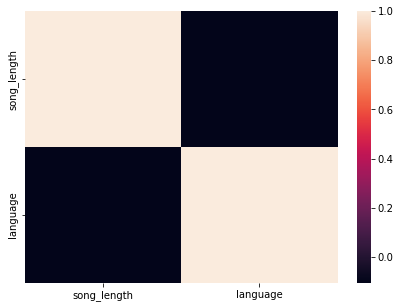

In [14]:
plt.figure(figsize=[7,5])
sns.heatmap(songs.corr())
plt.show()

(array([ 745762.,   15482.,       0.,   92518.,   41744.,   39201.,
           2385.,   14435., 1336694.,    8098.]),
 array([-1.,  5., 11., 17., 23., 29., 35., 41., 47., 53., 59.]),
 <BarContainer object of 10 artists>)

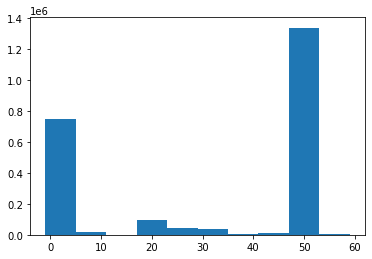

In [15]:
plt.hist(songs.language)

(array([ 639467.,  106295.,       0.,   15482.,       0.,       0.,
          92518.,       0.,   41744.,       0.,   39201.,       0.,
              0.,    2385.,       0.,   14435.,       0., 1336694.,
              0.,    8098.]),
 array([-1.,  2.,  5.,  8., 11., 14., 17., 20., 23., 26., 29., 32., 35.,
        38., 41., 44., 47., 50., 53., 56., 59.]),
 <BarContainer object of 20 artists>)

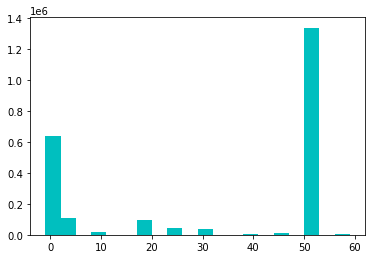

In [16]:
plt.hist(songs.language, bins=20, color='c')


#### Checking for outliers in bd column

<AxesSubplot:xlabel='bd'>

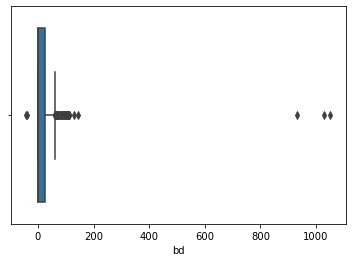

In [17]:
sns.boxplot(x=members['bd'])

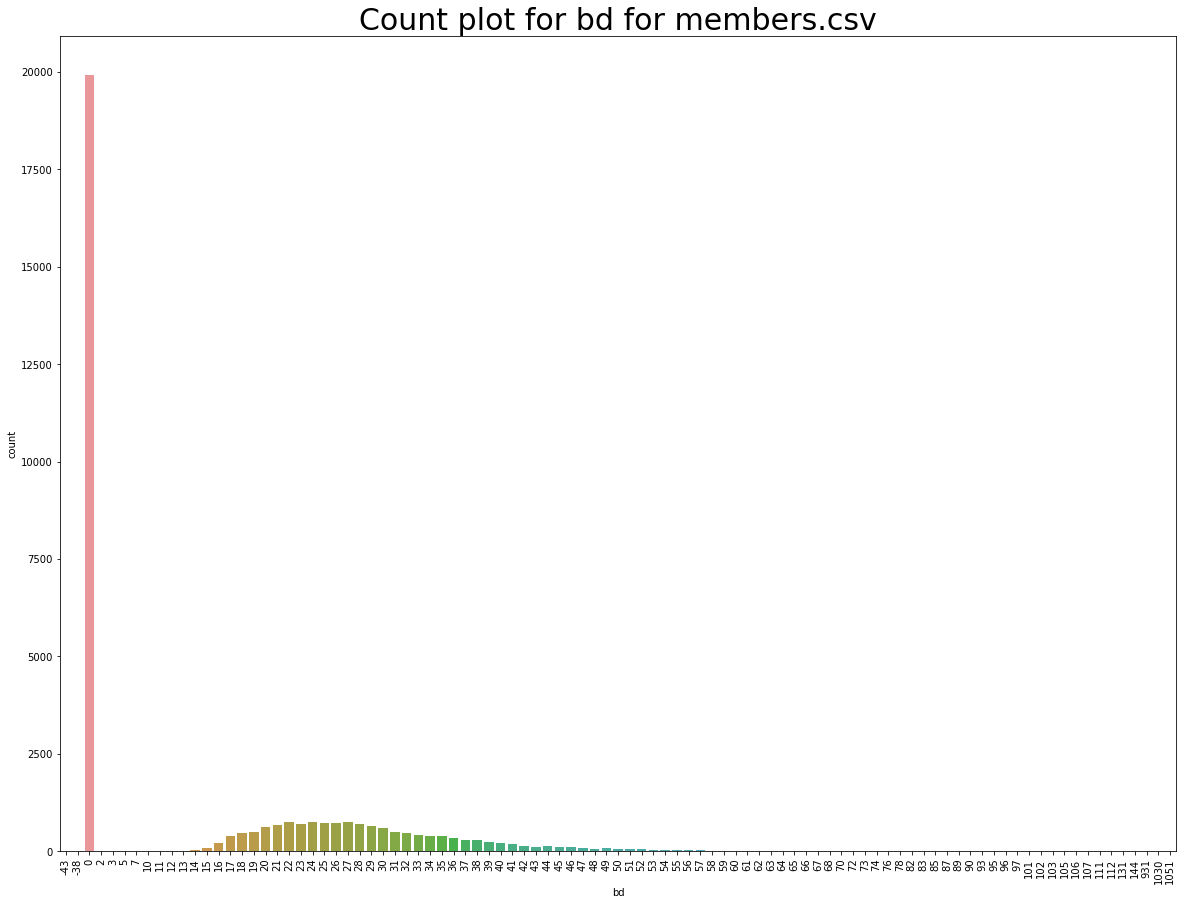

In [18]:
plt.figure(figsize=(20,15)) 
sns.countplot(x ='bd', data = members) 
plt.xticks(rotation='90')
plt.title('Count plot for bd for members.csv',fontsize=30)
plt.show() 

In [19]:
members["bd"].describe()

count    34403.000000
mean        12.280935
std         18.170251
min        -43.000000
25%          0.000000
50%          0.000000
75%         25.000000
max       1051.000000
Name: bd, dtype: float64

In [20]:
count=0
for i in members["bd"]:
    if i<=50 and i>=10:
        count+=1
percentage=(count/len(members["bd"]))*100
percentage=("{:.2f}".format(percentage))
print(percentage,"% of user is between 10 and 50")

40.74 % of user is between 10 and 50


Along with plots when we used .describe() function we have found 50% value is zero's which means half of our data is outliers and we also found that we have max value as 1051 and min value as -43 as all we know no one can have age belonging to these number's we have found 40.74% user has age between 10-50 however if we remove outliers from our data then this percentage value will increase to 98-99% because we have 50% of our data as zero's

##### Gender Column

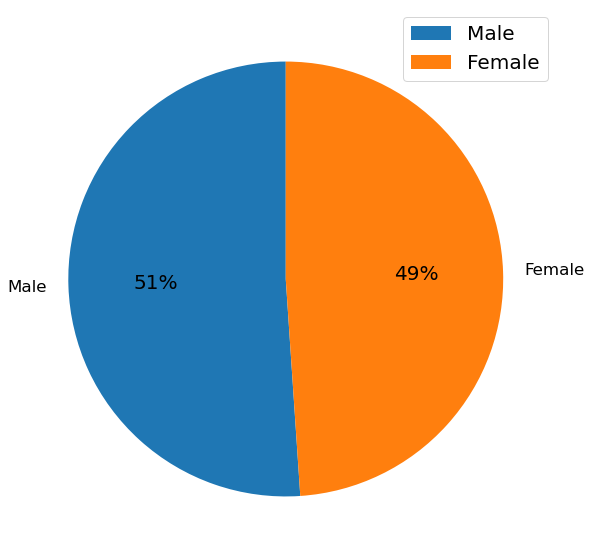

In [21]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 20.0
labels = ['Male','Female']
plt.figure(figsize = (10, 10))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

In [22]:
count = members["gender"].isna().sum()
percentage=(count/len(members['gender']))*100
percentage = "{:.3f}".format(percentage)
print("Total count of gender column of members                   :  ",len(members['gender']))
print("Number of NaN value in gender column of members           :  ",count)
print("Number of non-NaN value in gender coumn of members        :  ",(len(members['gender'])-count))
print("Total percentage of NaN value in gender column of members :  ",percentage+" %")
print("-----------------------------------------------------------------------")

Total count of gender column of members                   :   34403
Number of NaN value in gender column of members           :   19902
Number of non-NaN value in gender coumn of members        :   14501
Total percentage of NaN value in gender column of members :   57.850 %
-----------------------------------------------------------------------


#### City column

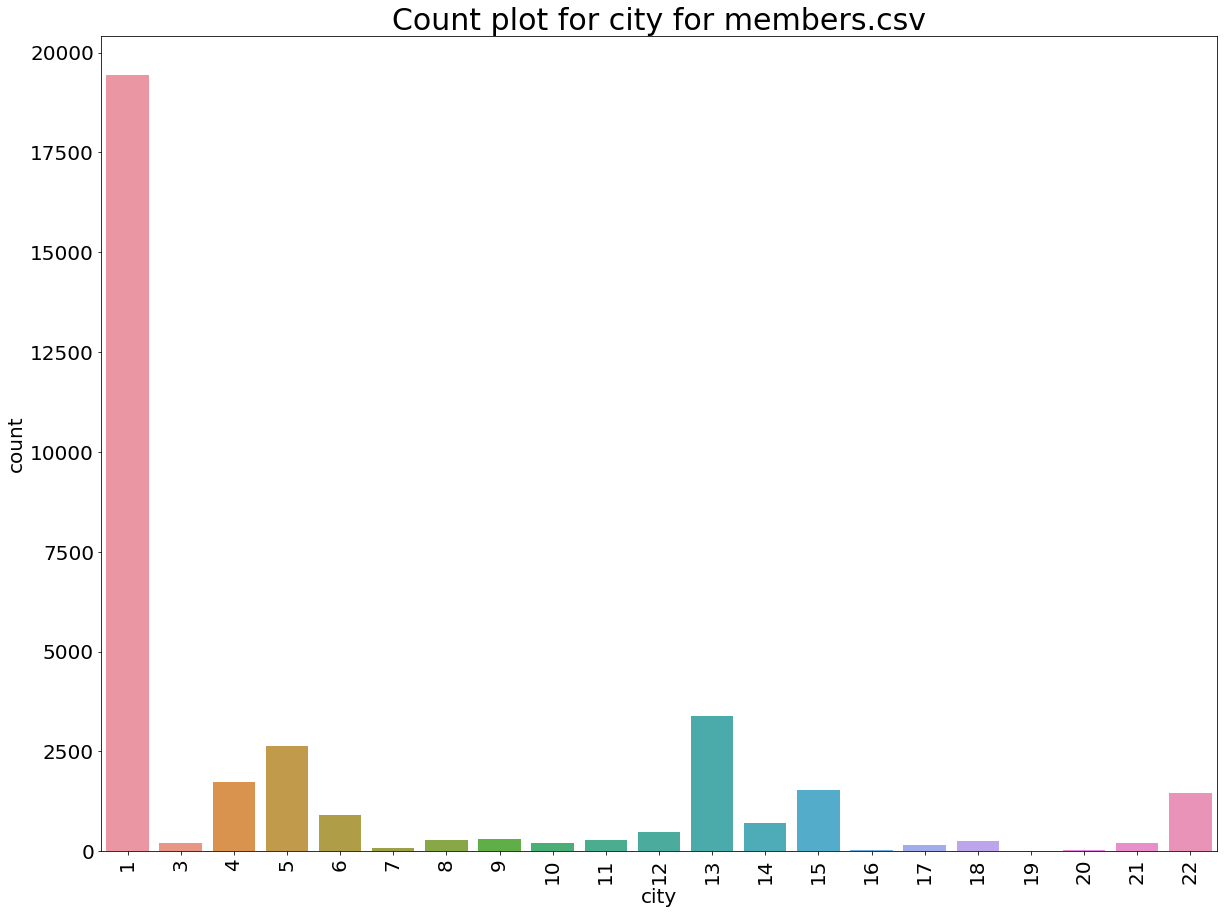

In [23]:
plt.figure(figsize=(20,15))
sns.countplot(x ='city', data = members) 
plt.xticks(rotation='90')
plt.title('Count plot for city for members.csv',fontsize=30)
plt.show() 

#### Registered via column

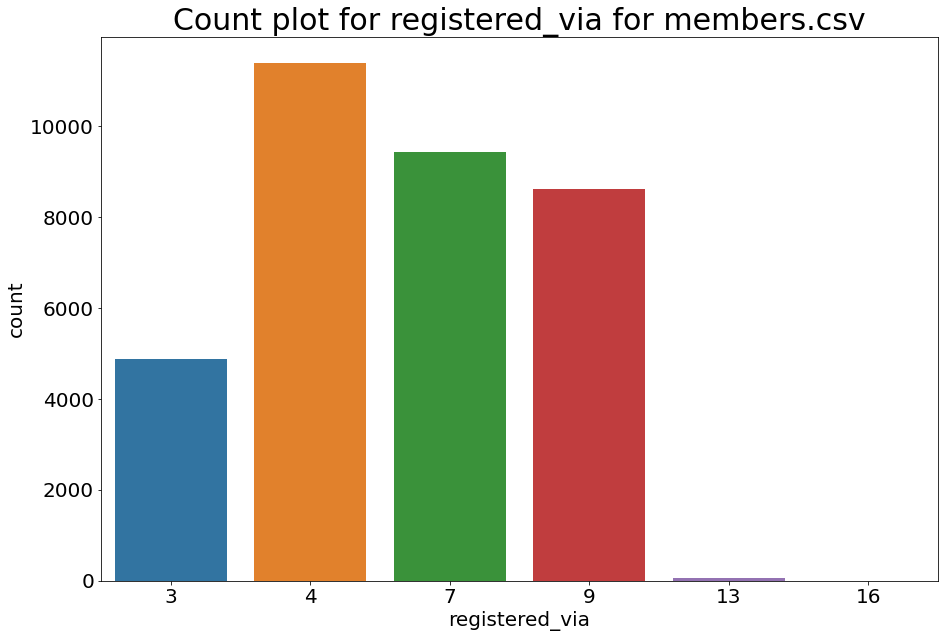

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(x ='registered_via', data = members) 
plt.title('Count plot for registered_via for members.csv',fontsize=30)
plt.show() 

In [25]:
members["registration_init_time"].head()

0    20110820
1    20150628
2    20160411
3    20150906
4    20170126
Name: registration_init_time, dtype: int64

In [26]:
members["expiration_date"].head()

0    20170920
1    20170622
2    20170712
3    20150907
4    20170613
Name: expiration_date, dtype: int64

#### Format Conversion

In [27]:
import pandas as pd
import numpy as np 
import datetime
members["expiration_date"]= pd.to_datetime(members["expiration_date"],format='%Y%m%d') 
members["registration_init_time"]= pd.to_datetime(members["registration_init_time"],format='%Y%m%d') 
members.dtypes

msno                              object
city                               int64
bd                                 int64
gender                            object
registered_via                     int64
registration_init_time    datetime64[ns]
expiration_date           datetime64[ns]
dtype: object

In [28]:
members["registration_init_time"].head()
members["expiration_date"].head()

0   2017-09-20
1   2017-06-22
2   2017-07-12
3   2015-09-07
4   2017-06-13
Name: expiration_date, dtype: datetime64[ns]

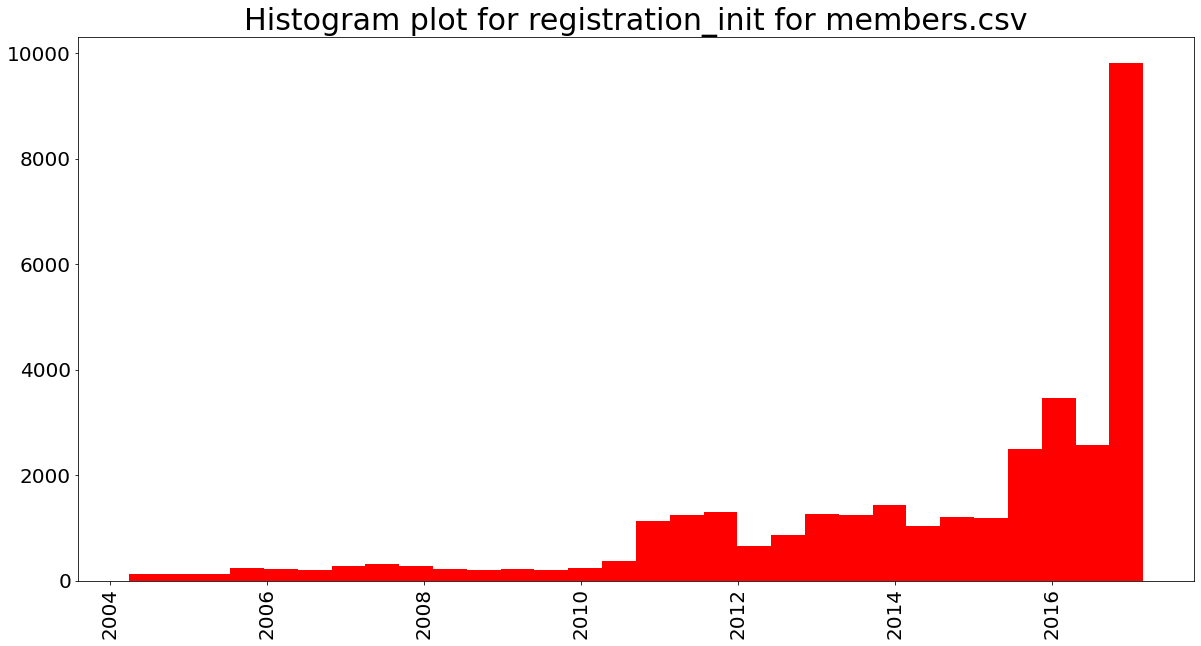

In [29]:
plt.figure(figsize=(20,10))
plt.hist(members["registration_init_time"],bins=30,color='red')
plt.xticks(rotation='90')
plt.title('Histogram plot for registration_init for members.csv',fontsize=30)
plt.show()

### Songs_extra Dataset

converting song duration from seconds to minutes

In [30]:
from tqdm import tqdm
lst=[]
for i in tqdm(songs["song_length"]):
    minutes = ((i/(1000*60))%60)
    minutes = round(minutes)
    lst.append(minutes)


100%|████████████████████████████████████████████████████████████████████| 2296320/2296320 [00:03<00:00, 616181.86it/s]


In [31]:
songs["song_duration_minutes"]=lst

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF for song_duration_minutes')

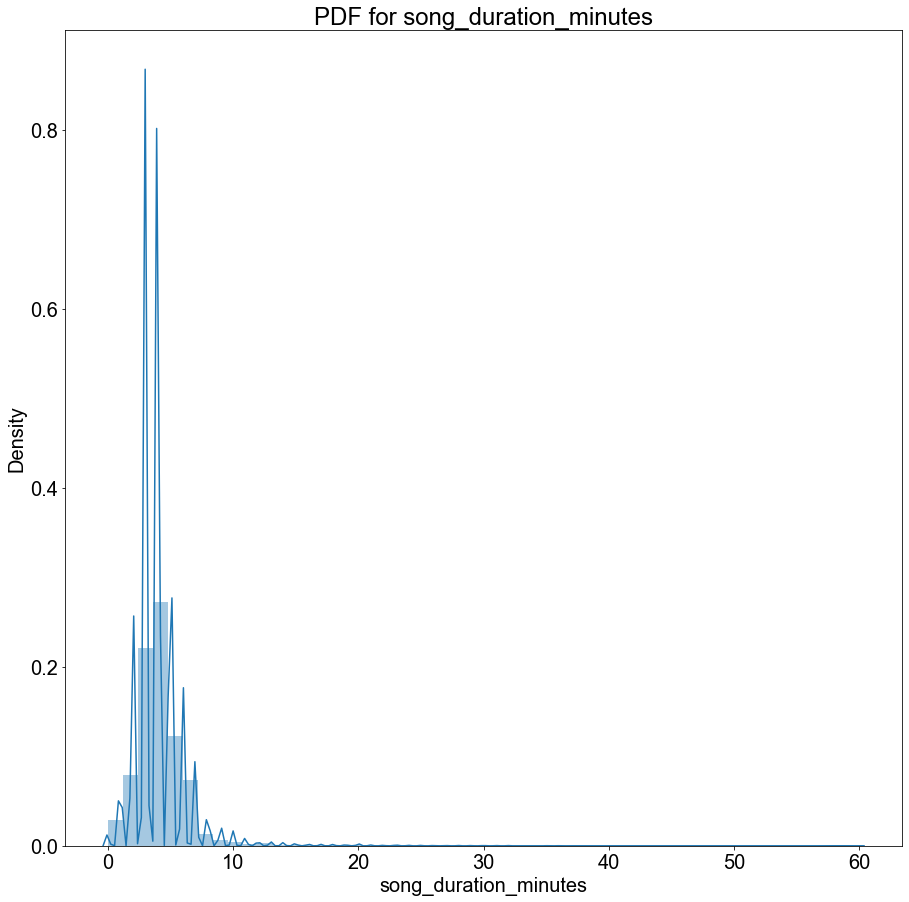

In [32]:
plt.figure(figsize = (15, 15)) 
sns.distplot(songs.song_duration_minutes)
sns.set(font_scale=2)
plt.title('PDF for song_duration_minutes')

In [33]:
count1=0
for i in songs["song_duration_minutes"]:
    if i<=10 and i>0:
        count1+=1
percentage1=(count1/len(songs["song_duration_minutes"]))*100
percentage1=round(percentage1)
print(percentage1,"% of song length is between 1 and 10")

98 % of song length is between 1 and 10


In [34]:
"""plt.figure(figsize = (15, 15)) 
sns.distplot(songs.genre_ids)
sns.set(font_scale=2)
plt.title('PDF for genre id')"""
count=0
for i in songs["genre_ids"]:
    if i=='864|857|850|843':
        count+=1
print("Total count for '864|857|850|843' in genre_ids column : ",count)

Total count for '864|857|850|843' in genre_ids column :  6842


In [35]:
lst1=[]
for i in songs["genre_ids"]:
  if i != '864|857|850|843':
    lst1.append(i)
print(lst1[:10])

['465', '444', '465', '465', '726', '458', '465', '465', '352|1995', '2157']


In [36]:
songs["genre_ids"]=songs["genre_ids"].astype(str)
import re
word = 'asdf*'
special_char=0
regexp = re.compile('[^0-9a-zA-Z]+')
for i in songs["genre_ids"]:
  if regexp.search(i):
    special_char+=1

print("Total count of values containing special character '|' in genre_ids column         : ",special_char)
print("Total percentage for values containing special character '|'  in genre_ids column  : ",(special_char/len(songs["genre_ids"]))*100,"%")

Total count of values containing special character '|' in genre_ids column         :  172876
Total percentage for values containing special character '|'  in genre_ids column  :  7.528393255295429 %


In [37]:
count1 = songs["genre_ids"].isnull().sum()
print("Total count of gender column of members                   :  ",len(songs["genre_ids"]))
print("Number of NaN value in gender column of members           :  ",count1)
print("Number of non-NaN value in gender coumn of members        :  ",(len(songs["genre_ids"])-count1))
print("-----------------------------------------------------------------------")

Total count of gender column of members                   :   2296320
Number of NaN value in gender column of members           :   0
Number of non-NaN value in gender coumn of members        :   2296320
-----------------------------------------------------------------------


#### Merging song and song extra

In [39]:
song_info = songsextra.merge(songs, on='song_id', how='left')

In [40]:
song_info.head()

,song_id,name,isrc,song_length,genre_ids,artist_name,composer,lyricist,language,song_duration_minutes
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043,307304.0,458,愛上巧克力 原聲帶,An-An Tso,NaN,3.0,5.0
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015,205914.0,1609,DJ Snake,Justin Bieber| William Grigahcine| Andrew Watt...,NaN,52.0,3.0
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303,252160.0,465,蕭敬騰 (Jam Hsiao),A Qin,A Qin| Chen Tian You| Wu Yi Wei,3.0,4.0
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446,175427.0,465,MKTO,Evan Bogart|Andrew Goldstein|Lindy Robbins|Ema...,Evan Bogart|Andrew Goldstein|Lindy Robbins|Ema...,52.0,3.0
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001,294983.0,458,羅志祥 (Show Lo),Drew Ryan Scott / David Moses Jassy / Niclas M...,Drew Ryan Scott / David Moses Jassy / Niclas M...,3.0,5.0


In [41]:
from collections import Counter 
import pandas as pd  
d = Counter(song_info["genre_ids"]) 
df = pd.DataFrame.from_records(d.most_common(), columns=['genre_id','count'])
print(df.head(50))

           genre_id   count
0               465  567699
1               958  176290
2              2022  168805
3              1609  166399
4              2122  139873
5              1259  101440
6               nan   94073
7               921   67561
8              1152   48713
9               359   43584
10              786   42989
11              726   34955
12              139   34871
13             1011   33999
14              940   33474
15         1572|275   24323
16             1955   20970
17              691   19468
18      139|125|109   17601
19              873   17533
20              437   17202
21              947   17099
22              388   16770
23              458   15434
24              444   14853
25             1616   14186
26              242   13748
27              451   13281
28              880   13053
29              423   11804
30              829   11752
31             2130   11049
32             1138   10767
33             1180   10700
34        1616|2058 

In [42]:
df.describe()

,count
count,1047.000000
mean,2192.904489
std,21063.057511
min,1.000000
25%,3.000000
50%,13.000000
75%,101.500000
max,567699.000000


Nan values in all columns

In [43]:
print("Total percentage for NaN value in song_id column        : ",(song_info["song_id"].isna().sum()/len(song_info["song_id"]))*100,"%")
print("Total percentage for NaN value in name column           : ",(song_info["name"].isna().sum()/len(song_info["name"]))*100,"%")
print("Total percentage for NaN value in isrc column           : ",(song_info["isrc"].isna().sum()/len(song_info["isrc"]))*100,"%")
print("Total percentage for NaN value in song_length column    : ",(song_info["song_length"].isna().sum()/len(song_info["song_length"]))*100,"%")
print("Total percentage for NaN value in genre_ids column      : ",(song_info["genre_ids"].isna().sum()/len(song_info["genre_ids"]))*100,"%")


print("Total percentage for NaN value in artist_name column    : ",(song_info["artist_name"].isna().sum()/len(song_info["artist_name"]))*100,"%")
print("Total percentage for NaN value in composer column       : ",(song_info["composer"].isna().sum()/len(song_info["composer"]))*100,"%")
print("Total percentage for NaN value in lyricist column       : ",(song_info["lyricist"].isna().sum()/len(song_info["lyricist"]))*100,"%")
print("Total percentage for NaN value in language column       : ",(song_info["language"].isna().sum()/len(song_info["language"]))*100,"%")

Total percentage for NaN value in song_id column        :  0.0 %
Total percentage for NaN value in name column           :  8.710911418306241e-05 %
Total percentage for NaN value in isrc column           :  5.9472876617344035 %
Total percentage for NaN value in song_length column    :  0.023911451843250633 %
Total percentage for NaN value in genre_ids column      :  0.023911451843250633 %
Total percentage for NaN value in artist_name column    :  0.023911451843250633 %
Total percentage for NaN value in composer column       :  46.6681417143335 %
Total percentage for NaN value in lyricist column       :  84.71674947113878 %
Total percentage for NaN value in language column       :  0.023955006400342163 %


### Music Recommendation - Using Random Forest, XGboos

In [51]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [52]:
# Load Python libraries
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble, metrics
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [53]:
df = pd.read_csv('train.csv')

In [54]:
df = pd.merge(df, songs, on='song_id', how='left')
del songs

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   msno                   object 
 1   song_id                object 
 2   source_system_tab      object 
 3   source_screen_name     object 
 4   source_type            object 
 5   target                 int64  
 6   song_length            float64
 7   genre_ids              object 
 8   artist_name            object 
 9   composer               object 
 10  lyricist               object 
 11  language               float64
 12  song_duration_minutes  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 788.0+ MB


In [56]:
df = pd.merge(df, members, on='msno', how='left')
del members

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 19 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   msno                    object        
 1   song_id                 object        
 2   source_system_tab       object        
 3   source_screen_name      object        
 4   source_type             object        
 5   target                  int64         
 6   song_length             float64       
 7   genre_ids               object        
 8   artist_name             object        
 9   composer                object        
 10  lyricist                object        
 11  language                float64       
 12  song_duration_minutes   float64       
 13  city                    int64         
 14  bd                      int64         
 15  gender                  object        
 16  registered_via          int64         
 17  registration_init_time  datetime64[ns]
 18  ex

In [58]:
# Replace NA
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 19 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   msno                    object        
 1   song_id                 object        
 2   source_system_tab       object        
 3   source_screen_name      object        
 4   source_type             object        
 5   target                  int64         
 6   song_length             float64       
 7   genre_ids               object        
 8   artist_name             object        
 9   composer                object        
 10  lyricist                object        
 11  language                float64       
 12  song_duration_minutes   float64       
 13  city                    int64         
 14  bd                      int64         
 15  gender                  object        
 16  registered_via          int64         
 17  registration_init_time  datetime64[ns]
 18  ex

In [60]:
# Create Dates

# registration_init_time
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# expiration_date
df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [61]:
#Dates to categoty
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [62]:
# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [63]:
df.corr()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
msno,1.000000,-0.000329,0.010263,-0.005538,-0.002996,0.000982,0.002164,0.002086,0.003519,0.003298,...,-0.006538,-0.002070,0.005967,0.011462,0.005086,0.011426,0.010833,0.002961,0.009144,0.000588
song_id,-0.000329,1.000000,-0.003968,0.001907,0.005296,-0.003742,-0.010901,0.008826,-0.021232,-0.034085,...,0.001280,-0.001071,0.001005,-0.000988,0.001039,-0.000103,-0.000420,-0.000837,0.000213,-0.000457
source_system_tab,0.010263,-0.003968,1.000000,-0.031238,-0.078480,0.031262,0.024268,0.036398,0.034861,0.057091,...,-0.024790,0.034411,-0.042791,0.055985,-0.039057,-0.015178,0.006189,0.038289,0.012783,0.007627
source_screen_name,-0.005538,0.001907,-0.031238,1.000000,0.415032,-0.056982,0.025332,-0.018531,0.010365,0.020619,...,0.018144,-0.032334,0.038329,-0.034513,0.036891,0.004828,-0.003591,-0.024016,-0.007776,-0.000224
source_type,-0.002996,0.005296,-0.078480,0.415032,1.000000,-0.124970,0.016496,-0.051539,-0.020126,-0.001341,...,0.023362,-0.025612,0.033412,-0.044805,0.031518,0.006498,0.001127,-0.036947,0.000260,-0.005091
target,0.000982,-0.003742,0.031262,-0.056982,-0.124970,1.000000,-0.001798,0.016411,0.012533,-0.001432,...,-0.013503,0.009893,-0.002825,0.059313,-0.001962,-0.005573,-0.001765,0.042248,0.011817,0.001923
song_length,0.002164,-0.010901,0.024268,0.025332,0.016496,-0.001798,1.000000,0.027015,0.113020,0.096611,...,0.003615,0.002749,-0.007259,0.006650,-0.007433,0.001509,-0.000004,0.004569,0.001314,0.000390
genre_ids,0.002086,0.008826,0.036398,-0.018531,-0.051539,0.016411,0.027015,1.000000,0.198331,0.147660,...,-0.005538,0.005106,-0.003082,0.005362,-0.003752,0.002988,0.001261,0.005717,-0.004083,0.002000
artist_name,0.003519,-0.021232,0.034861,0.010365,-0.020126,0.012533,0.113020,0.198331,1.000000,0.329520,...,-0.001343,0.000658,-0.007486,0.008968,-0.007973,0.004485,-0.000558,0.005703,0.002256,0.001806
composer,0.003298,-0.034085,0.057091,0.020619,-0.001341,-0.001432,0.096611,0.147660,0.329520,1.000000,...,-0.002259,0.001337,-0.005382,0.007175,-0.005804,0.004281,-0.001124,0.004540,0.002620,-0.000277


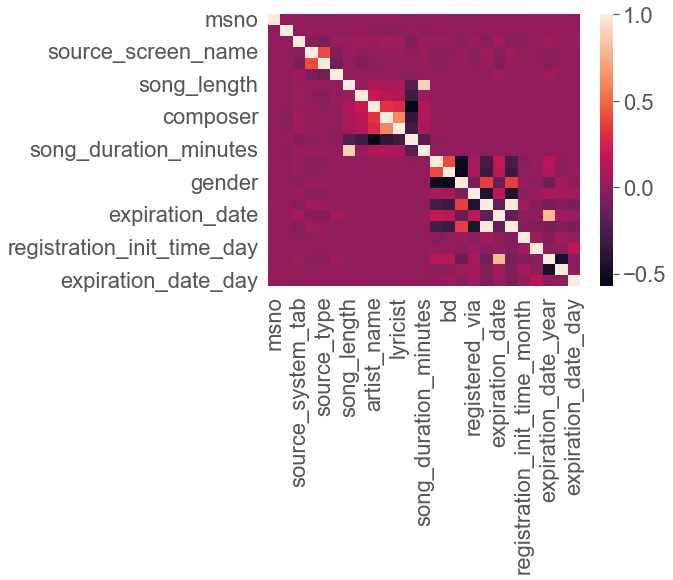

In [64]:
plt.figure(figsize=[7,5])
sns.heatmap(df.corr())
plt.show()

# RandomForest

In [ ]:
# Model with the best estimator
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(df[df.columns[df.columns != 'target']], df.target)

In [ ]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

In [ ]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [ ]:
model.feature_importances_

In [ ]:
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

In [ ]:
list(df.columns)

In [ ]:
target = df.pop('target')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(df, target, test_size = 0.3)
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
model.fit(train_data, train_labels)

In [ ]:
predict_labels = model.predict(test_data)
print(metrics.classification_report(test_labels, predict_labels))